In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# Normal **Distribution**

In [3]:
# import the tips data
tips_data = sns.load_dataset('tips')

In [4]:
# data sample
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


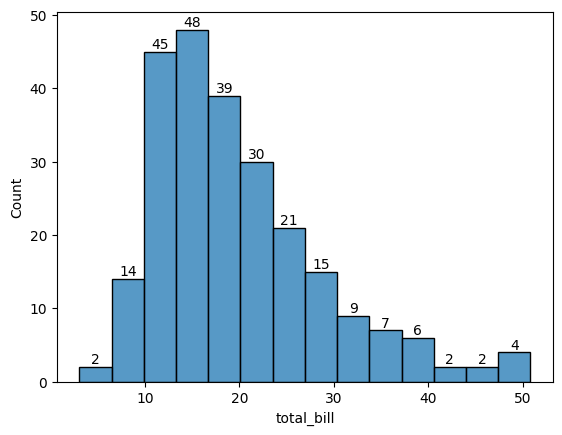

In [5]:
# Lets analyse the target column "total_bill"
ax = sns.histplot(tips_data['total_bill'])
ax.bar_label(ax.containers[0])
plt.show()

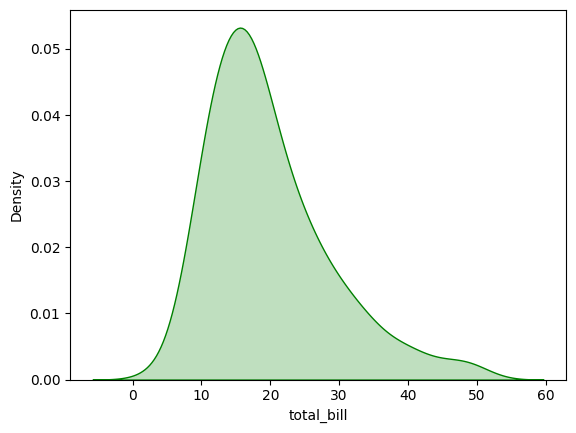

In [6]:
# Bell Curve
# KDE - kernal density estimate
sns.kdeplot(tips_data['total_bill'], color='green', fill=True)
plt.show()

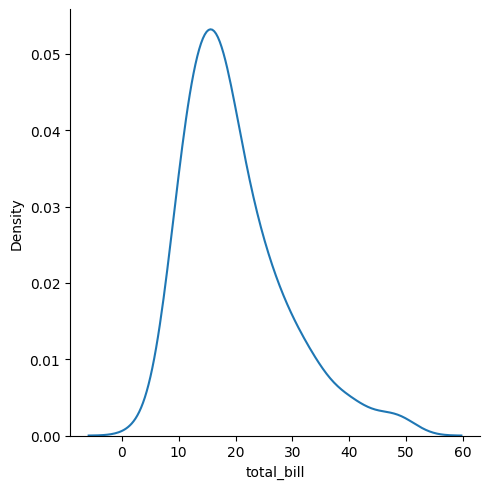

In [7]:
# Alternatively

sns.displot(tips_data['total_bill'], kind ='kde')  # kind='hist' : default
plt.show()

Mean: 19.78594262295082
Median: 17.795


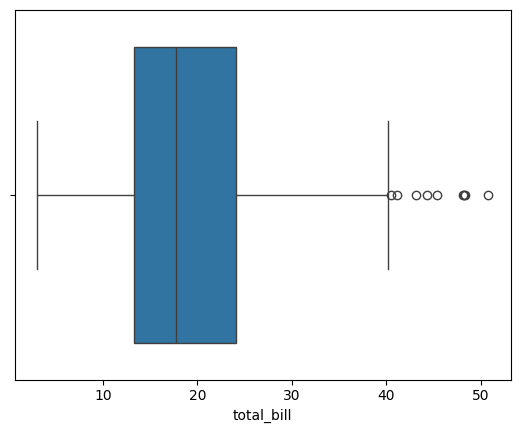

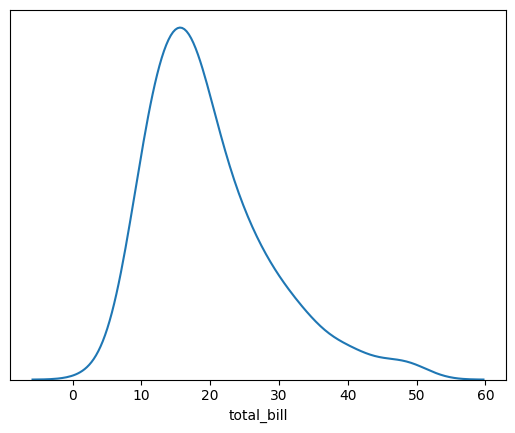

In [8]:
# Total Bill
# Mean and Median
print('Mean:',tips_data['total_bill'].mean())
print('Median:',tips_data['total_bill'].median())

# Box Plot
sns.boxplot(tips_data['total_bill'], orient='h')
plt.show()

# KDE plot
sns.kdeplot(tips_data['total_bill'])
plt.yticks([])
plt.ylabel('')
plt.show()

Mean: 2.99827868852459
Median: 2.9


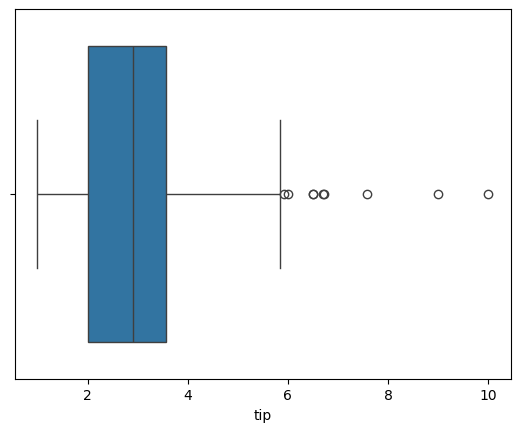

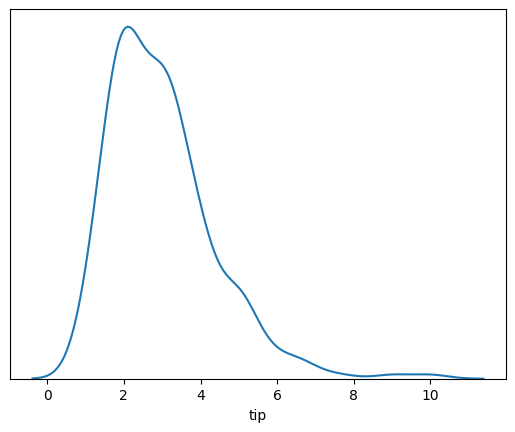

In [9]:
# TIPS
# Mean and Median
print('Mean:',tips_data['tip'].mean())
print('Median:',tips_data['tip'].median())

# Box Plot
sns.boxplot(tips_data['tip'], orient='h')
plt.show()

# KDE plot
sns.kdeplot(tips_data['tip'])
plt.yticks([])
plt.ylabel('')
plt.show()

In [16]:
# Treat the outlier values

q1 = tips_data['tip'].quantile(0.25)
q3 = tips_data['tip'].quantile(0.75)

iqr = q3-q1

l_fance = q1 - 1.5*iqr
u_fance = q3 + 1.5*iqr

# create duplciate of the tip data
tips_data['treated_tip'] = tips_data['tip']

# trim the outliers to the fence value(upper/lower)
tips_data['treated_tip'] = np.where(tips_data['treated_tip'] < l_fance, l_fance, tips_data['treated_tip'])   # condition, replacements
tips_data['treated_tip'] = np.where(tips_data['treated_tip'] > u_fance, u_fance, tips_data['treated_tip'])

Mean: 2.9500256147540984
Median: 2.9


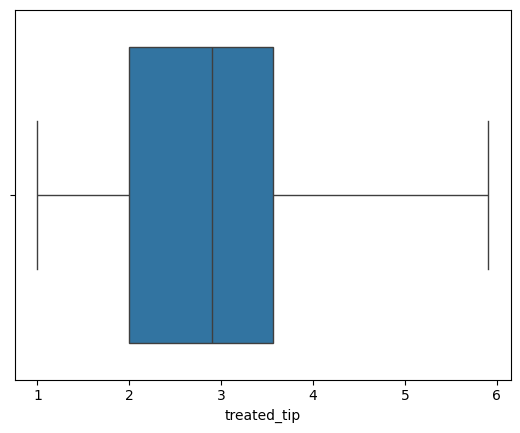

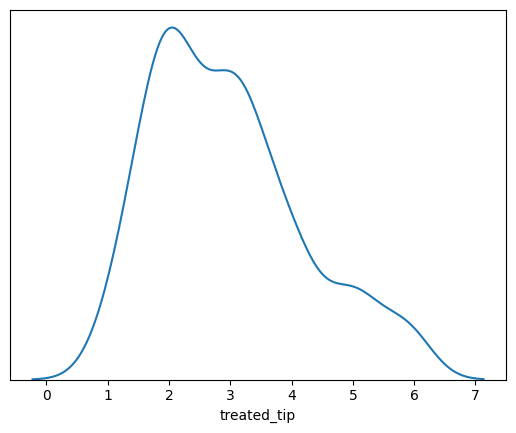

In [17]:
# TIPS - Treadted
# Mean and Median
print('Mean:',tips_data['treated_tip'].mean())
print('Median:',tips_data['treated_tip'].median())

# Box Plot
sns.boxplot(tips_data['treated_tip'], orient='h')
plt.show()

# KDE plot
sns.kdeplot(tips_data['treated_tip'])
plt.yticks([])
plt.ylabel('')
plt.show()

In [18]:
# data sample for the trimed values
tips_data[tips_data['tip']>u_fance]

,total_bill,tip,sex,smoker,day,time,size,treated_tip
23,39.42,7.58,Male,No,Sat,Dinner,4,5.90625
47,32.40,6.00,Male,No,Sun,Dinner,4,5.90625
59,48.27,6.73,Male,No,Sat,Dinner,4,5.90625
141,34.30,6.70,Male,No,Thur,Lunch,6,5.90625
170,50.81,10.00,Male,Yes,Sat,Dinner,3,5.90625
183,23.17,6.50,Male,Yes,Sun,Dinner,4,5.90625
212,48.33,9.00,Male,No,Sat,Dinner,4,5.90625
214,28.17,6.50,Female,Yes,Sat,Dinner,3,5.90625
239,29.03,5.92,Male,No,Sat,Dinner,3,5.90625


In [21]:
# Totle Bill
# Treat the outlier values
q1 = tips_data['total_bill'].quantile(0.25)
q3 = tips_data['total_bill'].quantile(0.75)
iqr = q3-q1

l_fance = q1-1.5*iqr
u_fance = q3+1.5*iqr

# trim the outliers to the fence value
tips_data['treated_bill']=tips_data['total_bill'].clip(lower=l_fance, upper=u_fance)

# Data Sample
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size,treated_tip,treated_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,1.01,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,1.66,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,3.50,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,3.31,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,3.61,24.59


Mean: 19.591670081967216
Median: 17.795


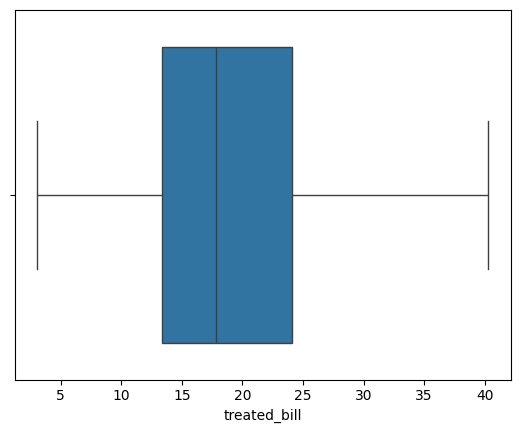

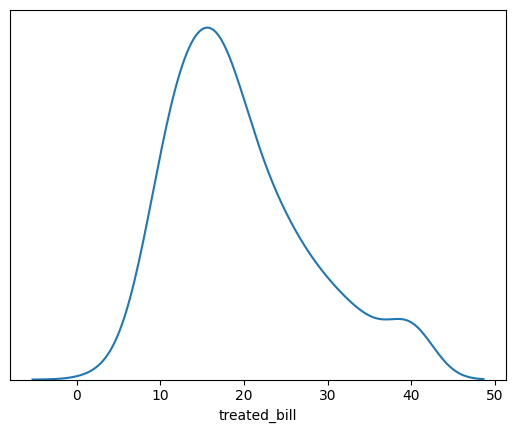

In [22]:
# Total Bill - Treadted
# Mean and Median
print('Mean:',tips_data['treated_bill'].mean())
print('Median:',tips_data['treated_bill'].median())

# Box Plot
sns.boxplot(tips_data['treated_bill'], orient='h')
plt.show()

# KDE plot
sns.kdeplot(tips_data['treated_bill'])
plt.yticks([])
plt.ylabel('')
plt.show()

Normal Distribution and Standard Normal Distribution

In [25]:
# Penguin data
penguin_data=sns.load_dataset('penguins')

#data sample
penguin_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [26]:
# drop missing value
penguin_data.dropna(inplace=True)

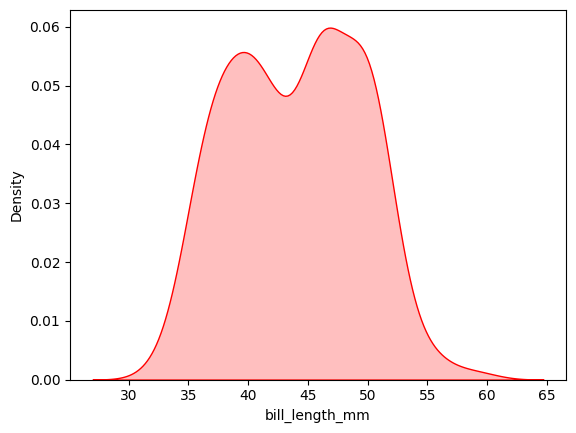

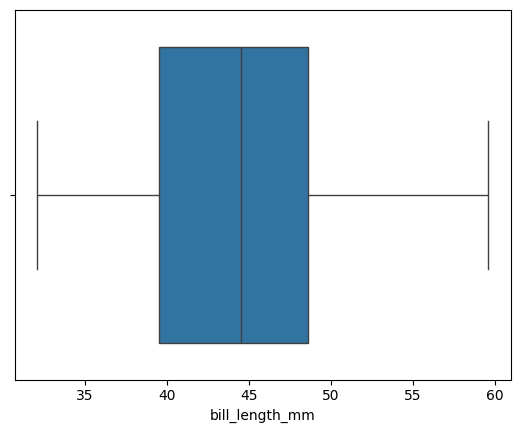

Mean: 43.99279279279279
Median: 44.5
SD: 5.468668342647562


In [114]:
# Distribution and values of 'bill_length_mm' before standardisation
sns.kdeplot(penguin_data['bill_length_mm'], color='red', fill=True)
plt.show()

# Box Plot
sns.boxplot(penguin_data['bill_length_mm'], orient='h')
plt.show()
print('Mean:',penguin_data['bill_length_mm'].mean())
print('Median:', round(penguin_data['bill_length_mm'].median(),2))
print('SD:',penguin_data['bill_length_mm'].std())

In [37]:
# convert normal distribution to standard normal distribution

    # Z-Score = (x-mean)/SD
    # we use sklearn library

# import sklearn function for standardisation

from sklearn.preprocessing import StandardScaler

In [48]:
# lets scale bill_length_mm

scale = StandardScaler()   # storing the object in a variable

scale_bill_length = scale.fit_transform(penguin_data[['bill_length_mm']])

# stats
print('Mean:',round(np.mean(scale_bill_length),2))
print('SD:',round(np.std(scale_bill_length),2))

Mean: 0.0
SD: 1.0


In [49]:
# stats summary of the data before standardizing
penguin_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [52]:
# lets scale the complete data

# extract only the numerical cols
num_cols = penguin_data.select_dtypes(include=['int','float'])

num_cols

# scale the data
num_cols_scaled = scale.fit_transform(num_cols)

# transformed array
num_cols_scaled

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [55]:
# covert the transformed array to dataframe

# num_cols_scaled_df = pd.DataFrame(num_cols_scaled)
num_cols_scaled_df = pd.DataFrame(num_cols_scaled, columns=scale.get_feature_names_out())

num_cols_scaled_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


In [58]:
# stats summary of the data after standardizing
round(num_cols_scaled_df.describe(),2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.00,333.00,333.00,333.00
mean,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-2.18,-2.07,-2.07,-1.87
25%,-0.82,-0.80,-0.78,-0.82
50%,0.09,0.07,-0.28,-0.20
75%,0.84,0.78,0.86,0.71
max,2.86,2.20,2.15,2.60


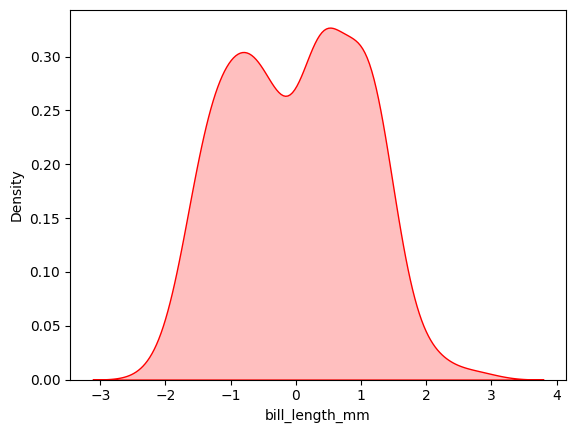

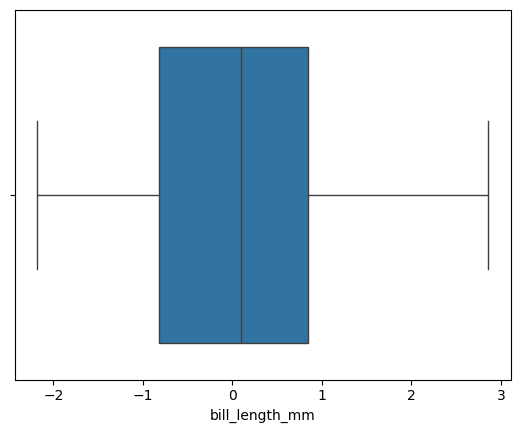

Mean: 3.8407715446491904e-16
SD: 1.0015048917468006


In [61]:
# Distribution and values of 'bill_length_mm' After standardisation
sns.kdeplot(num_cols_scaled_df['bill_length_mm'], color='red', fill=True)
plt.show()

# Box Plot
sns.boxplot(num_cols_scaled_df['bill_length_mm'], orient='h')
plt.show()
print('Mean:',num_cols_scaled_df['bill_length_mm'].mean())
print('SD:',num_cols_scaled_df['bill_length_mm'].std())

In [ ]:
# Home Work

# 1. Convert tips data from normal to standard normal
# 2. Convert titanic data from normal to standard normal

In [63]:
# 1. Convert tips data from normal to standard normal

# tips data
tips_data=sns.load_dataset('tips')

#data sample
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [91]:
# check null values
tips_data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


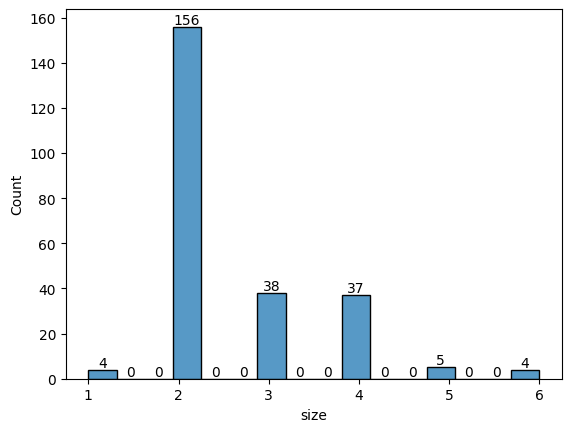

In [90]:
# Lets analyse the target column "size"
ax = sns.histplot(tips_data['size'])
ax.bar_label(ax.containers[0])
plt.show()

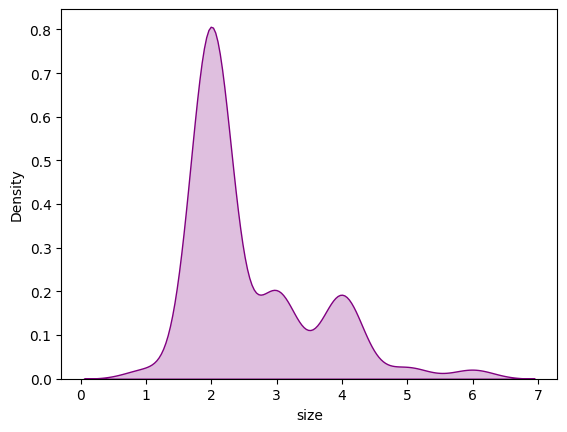

In [92]:
# Bell curve
# KDE - Kernel Density Estimate

sns.kdeplot(tips_data['size'], color='purple', fill=True)
plt.show()

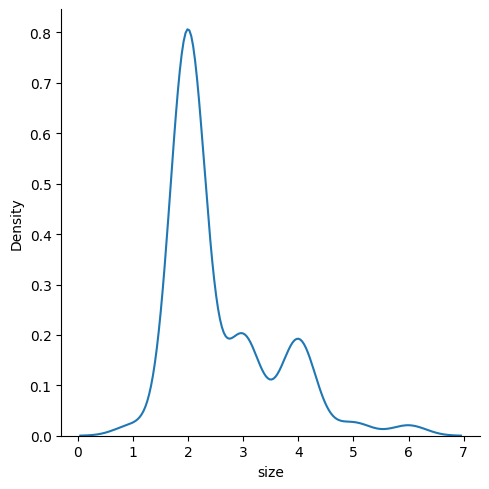

In [95]:
sns.displot(tips_data['size'], kind='kde')
plt.show()

Mean: 2.57
Median: 2.0


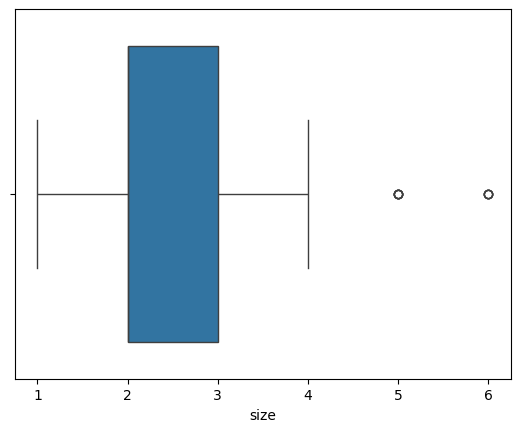

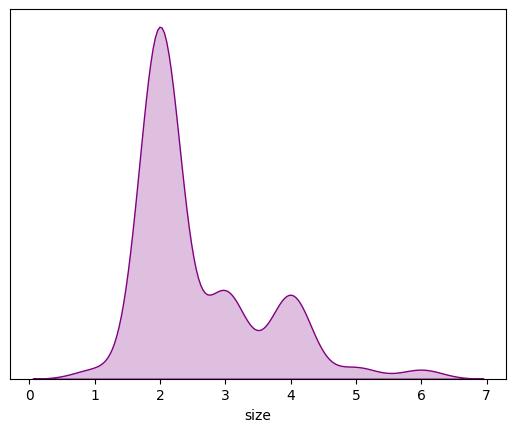

In [96]:
# before treated
# Mean and median
print('Mean:', round(tips_data['size'].mean(),3))
print('Median:', tips_data['size'].median())

# Box plot
sns.boxplot(tips_data['size'], orient='h')
plt.show()

# Kde plot
sns.kdeplot(tips_data['size'], color='purple', fill=True)
plt.yticks([])
plt.ylabel('')
plt.show()

In [100]:
# Treat the outlier values
q1 = tips_data['size'].quantile(0.25)
q3 = tips_data['size'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5*(iqr)
upper_fence = q3 + 1.5*(iqr)

# create duplciate of the tip data
tips_data['treadted_size'] = tips_data['size']

# trim the outliers to the fence value
tips_data['treadted_size'] = np.where(tips_data['treadted_size'] < lower_fence,lower_fence,tips_data['treadted_size'])
tips_data['treadted_size'] = np.where(tips_data['treadted_size'] > upper_fence, upper_fence, tips_data['treadted_size'])



Mean: 2.535
Median: 2.0


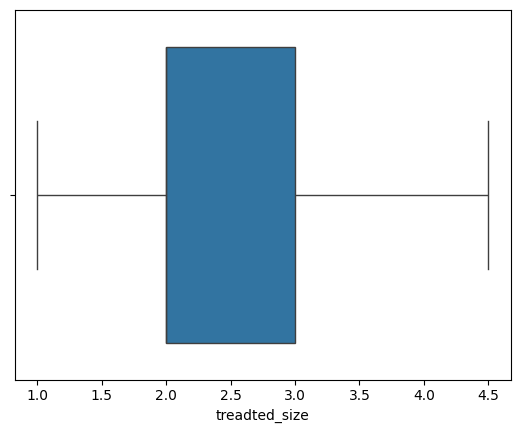

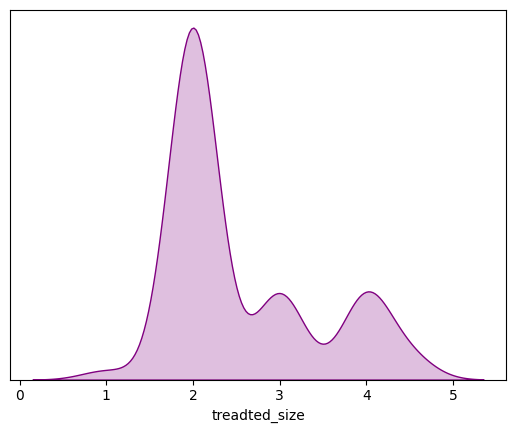

In [101]:
# after treated
# Mean and median
print('Mean:', round(tips_data['treadted_size'].mean(),3))
print('Median:', tips_data['treadted_size'].median())

# Box plot
sns.boxplot(tips_data['treadted_size'], orient='h')
plt.show()

# Kde plot
sns.kdeplot(tips_data['treadted_size'], color='purple', fill=True)
plt.yticks([])
plt.ylabel('')
plt.show()

In [102]:
# import sklearn function for standardisation
from sklearn.preprocessing import StandardScaler

# lets scale the complete data
num_cols = tips_data.select_dtypes(include=['int','float'])

# scale the data
num_cols_scaled = scale.fit_transform(num_cols)

# transformed array
num_cols_scaled

# covert the transformed array to dataframe
num_cols_scaled_df = pd.DataFrame(num_cols_scaled, columns=scale.get_feature_names_out())

# standardized dataframe
num_cols_scaled_df.head()

# stats summary of the data after standardizing
round(num_cols_scaled_df.describe(),2)

,total_bill,tip,size,treadted_size
count,244.00,244.00,244.00,244.00
mean,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.88,-1.45,-1.65,-1.80
25%,-0.72,-0.72,-0.60,-0.63
50%,-0.22,-0.07,-0.60,-0.63
75%,0.49,0.41,0.45,0.55
max,3.49,5.07,3.61,2.31


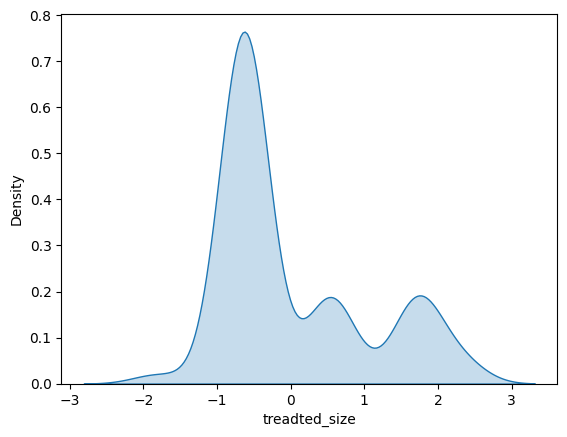

0.0
1.0


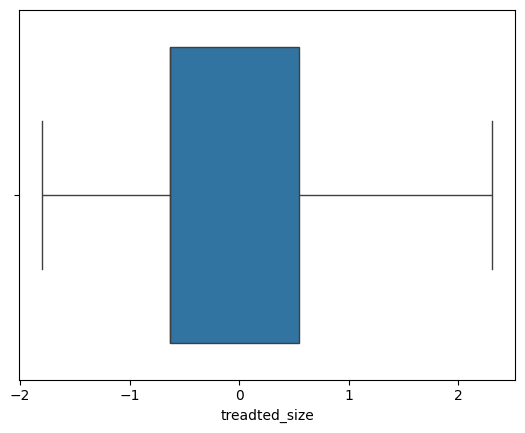

In [104]:
# Distribution and values of 'size' after standardisation

sns.kdeplot(num_cols_scaled_df['treadted_size'], fill=True)
plt.show()

sns.boxplot(num_cols_scaled_df['treadted_size'], orient='h')
print(round(np.mean(num_cols_scaled_df['treadted_size']),2))
print(round(np.std(num_cols_scaled_df['treadted_size']),2))

In [106]:
# 2. Convert titanic data from normal to standard normal

# import the titanic data
titanic_data=sns.load_dataset('titanic')

# data Sample
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [107]:
# chech nan values
titanic_data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [108]:
# drop the missing values
titanic_data.dropna(inplace=True)

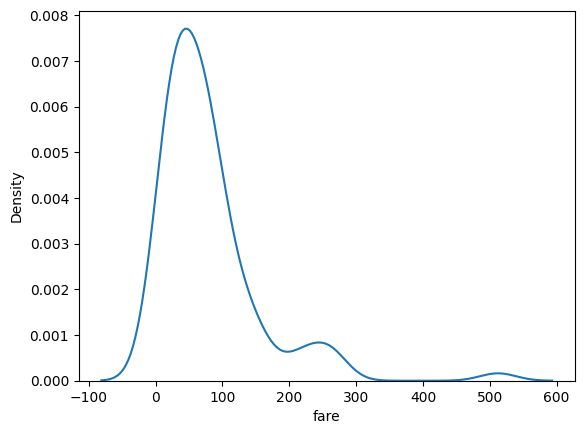

Mean: 78.92
Median: 57.0
SD: 76.49


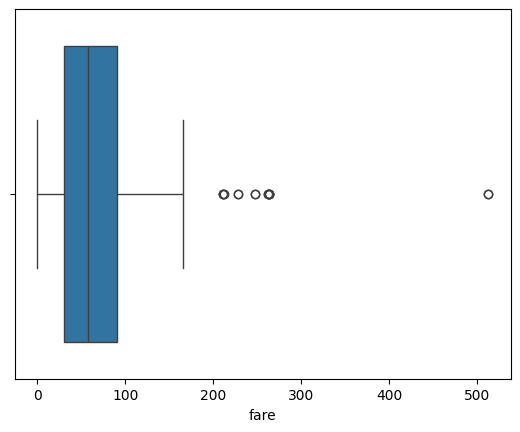

In [129]:
# Distribution and values of 'bill_length_mm' before standardisation
sns.kdeplot(titanic_data['fare'])
plt.show()

sns.boxplot(titanic_data['fare'], orient='h')
# stats of the data
print('Mean:', round(titanic_data['fare'].mean(),2))
print('Median:', round(titanic_data['fare'].median(),2))
print('SD:', round(titanic_data['fare'].std(),2))

In [ ]:
# convert normal distribution to standard normal distribution

    # Z-Score = (x-mean)/SD
    # we use sklearn library

# import sklearn function for standardisation
from sklearn.preprocessing import StandardScaler

In [121]:
# lets scale fare
scale = StandardScaler()

scaled_fare = scale.fit_transform(titanic_data[['fare']])

print(round(np.mean(scaled_fare),2))
print(round(np.std(scaled_fare),2))

0.0
1.0


In [124]:
# lets scale the complete data

# extract only the numerical cols
num_cols = titanic_data.select_dtypes(include=['int','float'])

num_cols_scaled = scale.fit_transform(num_cols)

num_cols_scaled

array([[ 0.69258559, -0.37341964,  0.15208196,  0.82857574, -0.63415863,
        -0.10011013],
       [ 0.69258559, -0.37341964, -0.03987502,  0.82857574, -0.63415863,
        -0.33848477],
       [-1.44386487, -0.37341964,  1.17585249, -0.72607153, -0.63415863,
        -0.35470782],
       ...,
       [ 0.69258559, -0.37341964,  1.30382381, -0.72607153,  0.69247206,
         0.05556562],
       [ 0.69258559, -0.37341964, -1.06364555, -0.72607153, -0.63415863,
        -0.64131507],
       [ 0.69258559, -0.37341964, -0.61574594, -0.72607153, -0.63415863,
        -0.64131507]])

In [127]:
# covert the transformed array to dataframe
num_cols_scaled_df =pd.DataFrame(num_cols_scaled, columns=scale.get_feature_names_out())
num_cols_scaled_df

,survived,pclass,age,sibsp,parch,fare
0,0.692586,-0.373420,0.152082,0.828576,-0.634159,-0.100110
1,0.692586,-0.373420,-0.039875,0.828576,-0.634159,-0.338485
2,-1.443865,-0.373420,1.175852,-0.726072,-0.634159,-0.354708
3,0.692586,3.510145,-2.023430,0.828576,0.692472,-0.815672
4,0.692586,-0.373420,1.431795,-0.726072,-0.634159,-0.686543
...,...,...,...,...,...,...
177,0.692586,-0.373420,0.727953,0.828576,0.692472,-0.345640
178,-1.443865,-0.373420,-0.167846,-0.726072,-0.634159,-0.969053
179,0.692586,-0.373420,1.303824,-0.726072,0.692472,0.055566
180,0.692586,-0.373420,-1.063646,-0.726072,-0.634159,-0.641315


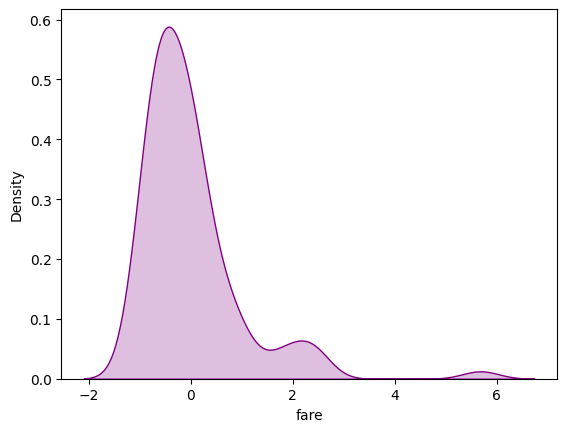

Mean: 0.0
SD: 1.0


In [128]:
# Distribution and values of 'fare' after standardisation
sns.kdeplot(num_cols_scaled_df['fare'], color='purple', fill=True)
plt.show()

# stats of the data
print('Mean:', round(num_cols_scaled_df['fare'].mean(),2))
print('SD:', round(num_cols_scaled_df['fare'].std(),2))